In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#создаем датафреймы по событиям и сабмишнам
events_data = pd.read_csv('event_data_train.csv')
submissions_data = pd.read_csv('submissions_data_train.csv')

In [4]:
#добавляем в сабмишн датасет столбцы где переводим таймстемп в дату и день
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [5]:
#аналогично для ивентс_дата
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<Axes: xlabel='day'>

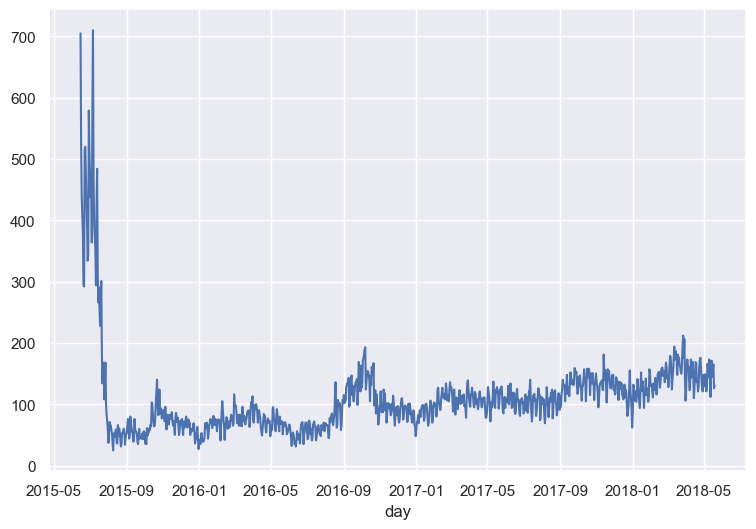

In [111]:
events_data.groupby('day').user_id.nunique().plot()

<Axes: >

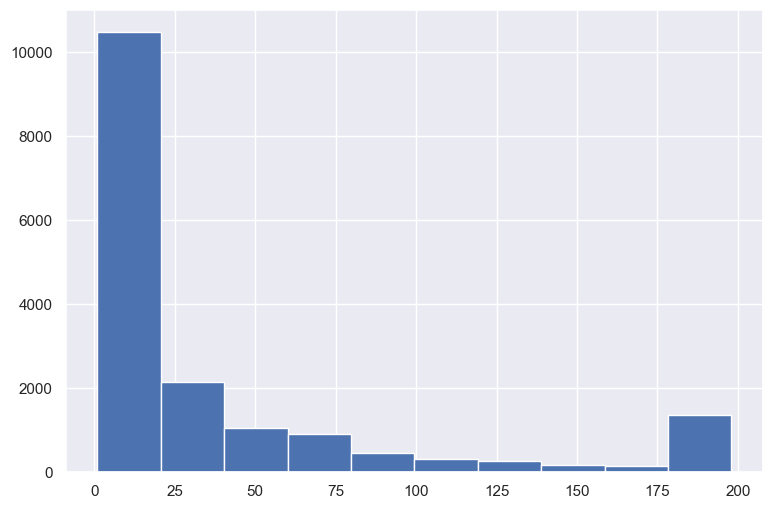

In [112]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(
    columns = {'step_id': 'passed_steps'}
).passed_steps.hist()

In [113]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(
    columns = {'step_id': 'passed_steps'}
).passed_steps.head()

0     9
1    87
2    11
3     1
4    84
Name: passed_steps, dtype: int64

In [114]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(
    columns = {'step_id': 'passed_steps'}
).user_id.nunique()

17262

In [115]:
events_data.user_id.nunique()

19234

In [116]:
# events_data[events_data.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(
#     columns = {'step_id': 'passed_steps'}
# ).passed_steps.min()

In [117]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [118]:
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [119]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index()

In [120]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [121]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']). \
    groupby('user_id')['timestamp'].apply(list). \
apply(np.diff).values

In [122]:
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)],
      shape=(19234,), dtype=object)

In [123]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [124]:
gap_data = gap_data / (24 * 60 * 60)

<Axes: >

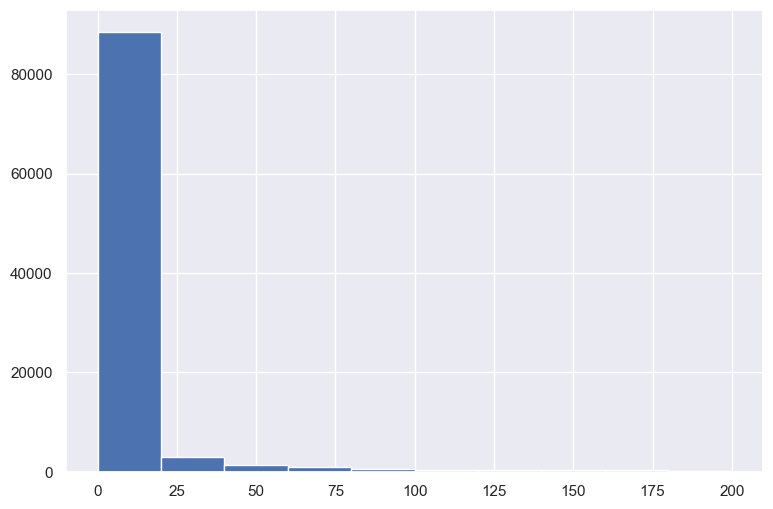

In [125]:
gap_data[gap_data < 200].hist()

In [126]:
gap_data.quantile(0.90)

np.float64(18.325995370370403)

In [127]:
30 * 24 * 60 *60

2592000

In [128]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [129]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'}).rename(columns ={'timestamp' :
                                                                                                        'last_timestamp'})

In [130]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 *60

In [131]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [132]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [133]:
users_data = users_data.fillna(0)

In [134]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [135]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [136]:
users_data = users_data.merge(users_events_data, how='outer')

In [137]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [138]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [139]:
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [140]:
users_data = users_data.merge(users_days, how='outer')

In [141]:
users_data.head(5)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [142]:
users_data.user_id.nunique()

19234

In [143]:
users_data['passed_course'] = users_data.passed > 170 #ПОДУМАЙ МБ ТУТ НАДО ДО 40 сделать

In [144]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [145]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [146]:
user_min_time = events_data.groupby('user_id', as_index=False). \
    agg({'timestamp' : 'min'}).rename({'timestamp' : 'min_timestamp'}, axis=1)

In [147]:
users_data = users_data.merge(user_min_time, how='outer')

In [148]:
event_data_train = pd.DataFrame()

In [149]:
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_threshold = min_user_time + 3 * 24 * 60 *60
    
#     user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]

#     event_data_train = event_data_train._append(user_events_data)



In [150]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [151]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [152]:
learning_time_threshold = 2 * 24 * 60 *60
learning_time_threshold

172800

In [153]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [154]:
user_learning_time_threshold.head()

0    1_1473000264
1    2_1514556164
2    3_1434531276
3    5_1466329609
4    7_1521807460
dtype: object

In [155]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [156]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [157]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473000264
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473000264
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514556164
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514556164
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514556164


In [158]:
events_data.shape

(3480703, 8)

In [159]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [160]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473000264
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473000264
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514556164
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514556164
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514556164


In [161]:
events_data_train.groupby('user_id').day.nunique().max()

np.int64(3)

In [162]:
submissions_data['user_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.user_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

np.int64(3)

In [163]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
.rename(columns={'day' : 'days'})

In [164]:
X.head()

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,2


In [165]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
.rename(columns={'step_id': 'steps_tried'})

In [166]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,18


In [167]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [168]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index())

In [169]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [170]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,2,18,18,23,0.439024


In [171]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                       fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [172]:
X = X.fillna(0)

In [173]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [174]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [175]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [176]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,1,0.0,0.0,0.0,0.0,0.0,1,False,True
1,2,1.0,2.0,2.0,0.0,1.0,9,False,True
2,3,1.0,4.0,4.0,4.0,0.5,20,False,True
3,5,0.0,0.0,0.0,0.0,0.0,1,False,True
4,7,0.0,0.0,0.0,0.0,0.0,1,False,True


In [177]:
y = X.passed_course.map(int)

In [178]:
y_check = pd.DataFrame({'passed_course': X.passed_course.map(int), 'user_id': X.user_id})
y_check = y_check.set_index(y_check.user_id)
y_check = y_check.drop(['user_id'], axis=1)

In [179]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [180]:
X = X.set_index(X.user_id)

In [181]:
X = X.drop(['user_id'], axis = 1)

In [182]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1
2,1.0,2.0,2.0,0.0,1.0,9
3,1.0,4.0,4.0,4.0,0.5,20
5,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,1


In [183]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: passed_course, dtype: int64

In [238]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [205]:
max_depth = range(1,15)
min_samples_split = range(round(0.001 * len(y)), round(0.01 * len(y)))
min_samples_leaf = range(round(0.001 * len(y)), round(0.01 * len(y)))

In [206]:
clf = DecisionTreeClassifier(max_depth=3)
params_DTC  = {'max_depth' : max_depth,'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
params_DTC  = {'criterion':['entropy'], 'max_depth' : range(1,5) }

In [207]:
best_clf = GridSearchCV(clf, params_DTC, cv=6, n_jobs=-1)
best_clf.fit(X_train, y_train)
clf = best_clf.best_estimator_

In [208]:
clf

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [209]:
y_test

11864    0
14933    0
16662    0
15033    0
2431     0
        ..
9344     0
14602    0
5138     0
12655    0
9431     0
Name: passed_course, Length: 3597, dtype: int64

In [210]:
y_predicted_prob = clf.predict_proba(X_test)

# выводим гистограммы вероятностей 0 и 1
# pd.Series(y_predicted_prob[:, 0]).hist()
# pd.Series(y_predicted_prob[:, 1]).hist()

In [212]:
roc_auc_score(y_test, y_predicted_prob[:,1])

0.820632574794474

In [213]:
# pd.Series(y_predicted_prob[:,0])

In [214]:
# y_pred = np.where(y_predicted_prob[:, 0] > 0.9, 0, 1)

In [215]:
# precision = precision_score(y_test, y_pred, pos_label=0)
# recall = recall_score(y_test, y_pred, pos_label=0)
# f1 = f1_score(y_test, y_pred, pos_label=0)
# print('precision_score=', precision, 'recall_score=', recall, 'f1_score=', f1)

In [216]:
# score'ы на кроссвалидации для лучшей модели
#pd.DataFrame(best_clf.cv_results_)

In [217]:
# визуализация дерева

# import graphviz

# dot_data = export_graphviz(clf, out_file=None,
#                      feature_names=list(X.columns),                     
#                      filled=True, rounded=True,
#                      special_characters=True, rotate=True)
# graph = graphviz.Source(dot_data)
# graph

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [221]:
clf = LogisticRegression()
params_LR =  {'solver': ['saga'], 'max_iter': [10000]}

In [222]:
best_clf = GridSearchCV(clf, params_LR, cv=6, n_jobs=-1)
best_clf.fit(X_train, y_train)
clf = best_clf.best_estimator_

In [223]:
clf

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,10000
,multi_class,'deprecated'


In [225]:
y_predicted_prob = clf.predict_proba(X_test)
roc_auc_score(y_test, y_predicted_prob[:,1])

0.8179305449614374

<Axes: >

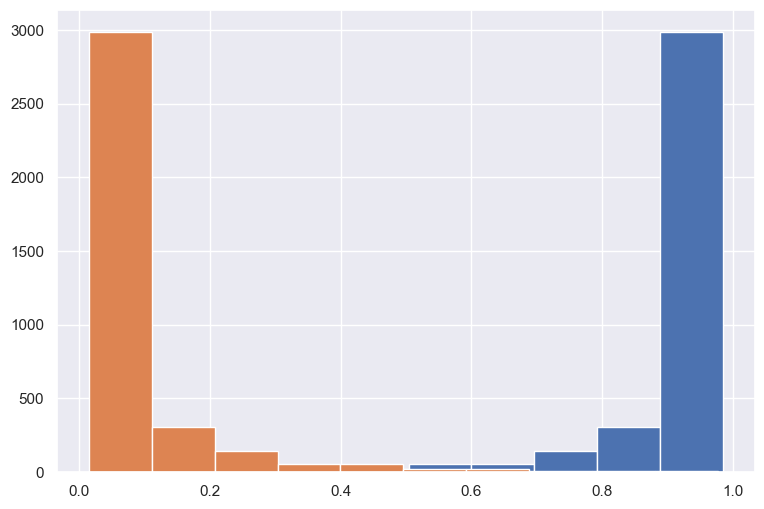

In [226]:
# выводим гистограммы вероятностей 0 и 1
pd.Series(y_predicted_prob[:, 0]).hist()
pd.Series(y_predicted_prob[:, 1]).hist()

In [227]:
# y_pred = np.where(y_predicted_prob[:, 0] > 0.5, 0, 1)

In [228]:
# precision = precision_score(y_test, y_pred, pos_label=0)
# recall = recall_score(y_test, y_pred, pos_label=0)
# f1 = f1_score(y_test, y_pred, pos_label=0)
# print('precision_score=', precision, 'recall_score=', recall, 'f1_score=', f1)

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [235]:
clf = RandomForestClassifier()

In [236]:
params_rf = {'n_estimators': range(20, 201, 10), 'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 
            'min_samples_split': range(18, 60, 2), 'min_samples_leaf': range(18, 60, 2), 'bootstrap': [True],
            }

In [262]:
best_clf = RandomizedSearchCV(clf, params_rf, cv=6, n_jobs=-1)
best_clf.fit(X_train, y_train)
clf = best_clf.best_estimator_

In [263]:
y_predicted_prob = clf.predict_proba(X_test)
roc_auc_score(y_test, y_predicted_prob[:,1])

0.8442352106110687

In [264]:
clf

,n_estimators,140
,criterion,'gini'
,max_depth,8
,min_samples_split,50
,min_samples_leaf,54
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [266]:
import pickle
filename = 'trained_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

passed_course    0
Name: 5242, dtype: int64

In [131]:
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
1,0.0,0.0,0.0,0.0,0.000000,1
2,1.0,2.0,2.0,0.0,1.000000,9
3,1.0,4.0,4.0,4.0,0.500000,20
5,0.0,0.0,0.0,0.0,0.000000,1
7,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...
26790,0.0,0.0,0.0,0.0,0.000000,2
26793,0.0,0.0,0.0,0.0,0.000000,1
26794,2.0,22.0,24.0,7.0,0.774194,90


In [ ]:
18-180 6-60 18-60